# **Kaggle Project 5: [Michael Lie]**

**Remember to write your team name above, which MUST match your team name on Kaggle!!** Assignments without a team name will receive a 0/40 on the "accuracy on test data" component of this assignment's grade.

### **Load the Data**

In [ ]:
# This cell is necessary only if you are running on Google Colab. It downloads the files to your
# Colab instance so you don't have to upload them here.

import requests

def save_file(url, file_name):
    r = requests.get(url)
    with open(file_name, 'wb') as f:
      f.write(r.content)

save_file('https://courses.cs.washington.edu/courses/cse416/23sp/homeworks/hw5/edx_train.csv',
          'edx_train.csv')
save_file('https://courses.cs.washington.edu/courses/cse416/23sp/homeworks/hw5/edx_test.csv',
          'edx_test.csv')

### **Sample Code: Random Classifier**

**NOTE**: This classifier **DOES NOT** count as one of the 2 required for this assignment! It is merely here to illstrate how to submit your predictions.

See the Kaggle assignment (Data tab) for a description of each column in the dataset. You are creating a classifier to predict whether or not a student will get certified, stored in the `"certified"` column.

In [ ]:
import pandas as pd
from sklearn.dummy import DummyClassifier

target = "certified" # target column

# This classifier returns labels sampled uniformly at random
df_train = pd.read_csv('edx_train.csv')
dummy_model = DummyClassifier(strategy="uniform")
dummy_model.fit(df_train.drop(target, axis=1), df_train[target])

DummyClassifier(strategy='uniform')

The code below generates predictions on the test set, and outputs the predictions into a CSV file.

In [ ]:
# Generate predictions on the test set
df_test = pd.read_csv('edx_test.csv')
predictions = dummy_model.predict(df_test)

# Save your predictions as a CSV
to_save = df_test[['userid_DI']].copy()
to_save.loc[:, 'certified'] = predictions
to_save.to_csv('submission.csv', index=False)

# See below for instructions on how to upload submission.csv to Kaggle,
# in order to evaluate your model and get points.

### **[5 Pts] Model Comparison**

**Instructions**: Run at least 2 different classification models. The classification models we have learned in class are: [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [k-Nearest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Random Forests](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), and [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html), [Neural Networks](https://scikit-learn.org/stable/modules/neural_networks_supervised.html). For each model, try at least 2 different hyperparameter settings.

Then, make one or more visualizations that let you compare the models you trained. Sample visualizations you can make include confusion matrices, or graphs of train and validation accuracy/error. See past section and homework code for how to make these visualizations.

0.5679223744292238
Model 1 (Logistic Regression) with L2 penalty 0.001: Validation Accuracy = 0.96175799086758
0.5679223744292238
Model 1 (Logistic Regression) with L2 penalty 0.01: Validation Accuracy = 0.9634703196347032
0.5679223744292238
Model 1 (Logistic Regression) with L2 penalty 0.1: Validation Accuracy = 0.9634703196347032
0.5679223744292238
Model 1 (Logistic Regression) with L2 penalty 1: Validation Accuracy = 0.9628995433789954
0.5679223744292238
Model 1 (Logistic Regression) with L2 penalty 10: Validation Accuracy = 0.9600456621004566
0.5679223744292238
Model 1 (Logistic Regression) with L2 penalty 100: Validation Accuracy = 0.958904109589041
Model 2 (KNN) with 5 neighbors: Validation Accuracy = 0.771689497716895
0.5679223744292238
Model 2 (KNN) with 10 neighbors: Validation Accuracy = 0.7819634703196348
0.5679223744292238
Model 2 (KNN) with 15 neighbors: Validation Accuracy = 0.7819634703196348
0.5679223744292238
Model 2 (KNN) with 20 neighbors: Validation Accuracy = 0.776

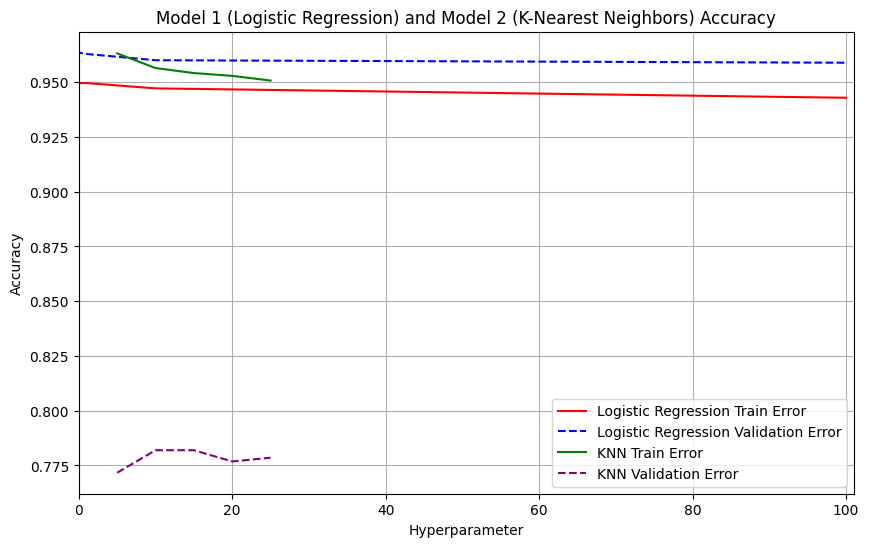

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer


# -Pre-processing-
# Encoding categorical values in the dataframe
# Replace missing categorical values with mode
# Replace missing numerical values with mean
# Dropping not significant features to be included

category_cols = df_train.select_dtypes(include=['object']).columns
label_encoder = {}
for col in category_cols:
    df_train[col] = LabelEncoder().fit_transform(df_train[col])
    df_test[col] = LabelEncoder().fit_transform(df_test[col])



from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df_train.drop(['certified', 'userid_DI'], axis=1), df_train['certified'], test_size=0.2, random_state=1)


imputer = SimpleImputer(strategy = 'mean')
X_train = imputer.fit_transform(X_train)
X_val = imputer.fit_transform(X_val)


# -Model 1: Logistic Regression with 6 different hyperparameters (l2 penalty/ regularization)-
from sklearn.linear_model import LogisticRegression
l2_penalties = [0.001, 0.01, 0.1, 1, 10, 100]
l2_penalty_names = [f'coefficients [L2={l2_penalty:.0e}]'
                    for l2_penalty in l2_penalties]

accuracy_data_model1 = []

for l2_penalty, l2_penalty_column_name in zip(l2_penalties, l2_penalty_names):
  model_1 = LogisticRegression(penalty = 'l2', C = 1/l2_penalty, fit_intercept = False, max_iter = 10000)
  model_1.fit(X_train, y_train)

  train_accuracy = model_1.score(X_train, y_train)
  val_accuracy = model_1.score(X_val, y_val)

  accuracy_data_model1.append({
        'l2_penalty': l2_penalty,
        'train_accuracy': train_accuracy,
        'validation_accuracy': val_accuracy,
    })

  y_pred_model_1 = model_1.predict(X_val)
  y_pred_class = [int(pred.argmax()) for pred in y_pred_model_1]

  accuracy = accuracy_score(y_val, y_pred_class)
  print(accuracy)
  print(f"Model 1 (Logistic Regression) with L2 penalty {l2_penalty}: Validation Accuracy = {val_accuracy}")

accuracies_table_1 = pd.DataFrame(accuracy_data_model1)


# -Model 2: K-Nearest Neighbors (KNN) with 2 Neighbors with 5 different hyperparameters (5 neighbors)-
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = [5, 10, 15, 20, 25]
accuracy_data_model2 = []

for n_neighbor in n_neighbors:
  model_2 = KNeighborsClassifier(n_neighbors = n_neighbor)
  model_2.fit(X_train, y_train)

  train_accuracy = model_2.score(X_train, y_train)
  val_accuracy = model_2.score(X_val, y_val)

  accuracy_data_model2.append({
        'n_neighbors': n_neighbor,
        'train_accuracy': train_accuracy,
        'validation_accuracy': val_accuracy,
    })

  predictions_model_2 = model_2.predict(X_val)
  y_pred_class = [int(pred.argmax()) for pred in predictions_model_2]

  print(f"Model 2 (KNN) with {n_neighbor} neighbors: Validation Accuracy = {val_accuracy}")


  accuracy = accuracy_score(y_val, y_pred_class)
  print(accuracy)

accuracies_table_2 = pd.DataFrame(accuracy_data_model2)


# -Select the the Logistic Regression as the chosen best model due to validation accuracy-
# Make predictions based on the Logistic Regression model
best_model = max(accuracy_data_model1, key=lambda x: x['validation_accuracy'])
model_1 = LogisticRegression(penalty='l2', C=1/best_model['l2_penalty'], fit_intercept=False, max_iter=10000)
model_1.fit(X_train, y_train)


df_test = df_test.drop(columns=['userid_DI'])
df_test = imputer.transform(df_test)


predictions_lr = model_1.predict(df_test)
predictions_1 = [int(pred) for pred in predictions_lr]


# -Saving to submission.csv file-
df_test_submission = pd.read_csv('edx_test.csv')
to_save = pd.DataFrame()
to_save['userid_DI'] = df_test_submission['userid_DI']
to_save['certified'] = predictions_1
to_save.to_csv('submission.csv', index=False)



# -Checking Accuracies tables-
print(accuracies_table_1)
print(accuracies_table_2)

# -Plotting Training and Validation Accuracies-
plt.figure(figsize = (10,6))

plt.plot(accuracies_table_1['l2_penalty'], accuracies_table_1['train_accuracy'], color = 'red', label = 'Logistic Regression Train Error')
plt.plot(accuracies_table_1['l2_penalty'], accuracies_table_1['validation_accuracy'], color = 'blue', linestyle = '--', label = 'Logistic Regression Validation Error')

plt.plot(accuracies_table_2['n_neighbors'], accuracies_table_2['train_accuracy'], color = 'green', label = 'KNN Train Error')
plt.plot(accuracies_table_2['n_neighbors'], accuracies_table_2['validation_accuracy'], color = 'purple', linestyle = '--', label = 'KNN Validation Error')

plt.title('Model 1 (Logistic Regression) and Model 2 (K-Nearest Neighbors) Accuracy')
plt.xlabel('Hyperparameter')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.xlim(0,101)
plt.show()

**Remember to submit your submissions CSV FILE on Kaggle!** 40 pts come from your accuracy on the private test data.

Attend section on Thurs 5/11 for a demo of how to uppload submissions to Kaggle. We also have screenshots below (ingore summer and homework number in pictures)

Step 1: See the list of files on Colab

![See Colab Files](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/1_colab_see_files.jpg)

Step 2: Download `submission.csv`

![Download Colab File](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/2_colab_download_file.jpg)

Step 3: Join the Kaggle competition.

![Join the Kaggle Competition](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/3_kaggle_join_competition.jpg)

Step 4: Enusre your team name in Kaggle matches the one at the top of this notebook!

![Check Team Name](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/4_kaggle_team_name.jpg)

Step 5: Upload `submission.csv` to Kaggle

![Upload submission.csv](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/6_kaggle_upload_submission.jpg)



### **Discussion**



#### **[7 Pts] Training the Models**

**Instructions**: Discuss what models you tried, and what you did to improve your initial predictions. Discuss what hyperparameters you tried, and which hyperparameters seemed important for your final model. Finally, discuss what you are inferring from the above visualiation(s).

In Homework 5, I've trained two models using 2 classification algorithms: Logistic Regression with 6 different hyper-parameters of l2 regularization (l2 penalties: 0.001, 0.01, 0.1, 1, 10, 100), and K-Nearest Neighbors with 5 different hyper-parameters of 5 neighbors: 5, 10, 15, 20, 25.

Initially, without any pre-processing as it is given in the starter code (without any edits), the accuracy is 0.51642 which is not good. As I did the pre-processing, I applied several methods to enable both classification algorithms to be trained on, such as; handling missing values (NaN) as well as encoding categorical variables by one-hot encoding (converting categorical variables into numerical variables). After the pre-processing, I trained the model on top of the pre-processed data and displayed the validation and training accuracy varies on different hyperparameters for both the Logistic Regression and KNN models.

From the accuracy graph, smaller l2 regularization parameter (l2 penalty) yields higher validation accuracy (smaller l2 -> higher C).

From the accuracy graph, the choice of number of neighbors shows different impact on the validation accuracy which we do not know how to judge from the graph above, regarding how the validation accuracy would react as we include more neighbors (hyper-parameter).

In conclusion, I've decided to use the Logistic Regression as the best model as it yields the highest validation accuracy which meets the requirement of the assignment, which is to get a minimum of 0.95 accuracy.


#### **[3 Pts] Feature Selection**

**Instructions**: Discuss what features you used and whether you did some transformations on them. What features seemed important for your final model?

In my pre-processing stage, I've dropped one feature or column which is userid_ID and decided to use the rest columns as my features when training the models. In my pre-processing, I handled missing values (NaN) by imputing the mean whenever the entry is NaN as well as encode categorical variables by transforming them into numerical variables in order for the models to be able to read them and trained upon the new pre-processed data.


In [ ]:
coefficients = model_1.coef_
print()
print(coefficients)

print()

print(df_train.head())

print()

print('Largest Coefficient:', coefficients.min())
print()
print(coefficients[0])



[[ 5.00407512e-01 -6.47276755e-02  9.25121638e+00  1.60233057e+00
  -2.40457131e-02  6.16730681e-02 -7.56256976e-03 -1.49822969e-01
   1.03016479e-03  7.75352655e-03  1.03400425e-04  7.58642610e-02
  -1.71852943e-04  2.26820616e-01 -7.76629860e-01]]

   course_id  userid_DI  registered  viewed  explored  certified  \
0          1       8036           1       1         1          1   
1          2       7908           1       1         1          1   
2          1       6543           1       1         1          1   
3          2       4051           1       1         1          1   
4          1       3676           1       1         0          0   

   final_cc_cname_DI  LoE_DI     YoB  gender  start_time_DI  last_event_DI  \
0                 32       3  1984.0       1            152            268   
1                 31       3  1985.0       0            155            279   
2                 10       5     NaN       2            333            260   
3                 31       

As we can see from the above, that the Largest Coefficient with the greatest magnitude (absolute value) of 0.7766298604983648 that corresponds to the nforum_posts feature.

#### **[5 Pts] Ethical Implications**

**Instructions**: Consider and discuss the ethical implications of using the model you trained. Imagine you were hired to work as a data scientist for an online education platform (exciting, right?). They want to use your model to predict which students they should tailor their course material towards so they can maximize their profits. Their idea is to use the model to help predict which student groups (i.e. from specific countries or certain educational backgrounds) would make them the most money by getting the most participants to complete their paid certificate program. Are there any ethical considerations we should think about before acting on that plan?

Using a predictive model with the short-term purpose of making the most money out of the students by getting the most participants to complete their paid certificate program raises several ethical concerns such as biases to be present in the data, undermining the online education platform's credibility and integrity, and could lead to discrimination.

Firstly, using the predictive model with the purpose of making the most money, if not careful enough, it could lead to a certain bias which is the historical bias. As we know a historical bias is described as the world we lived in one that contains biases for/against certain demographics, even 'accurate' data could still be harmful. Which also means that historical bias exists even with perfect sampling or feature measurement (other sources of bias are possible). In our case, access to education could be taken account of as it may indirectly reinforce inequalities.

Moreover, the online education platform's credibility and integrity would be questioned due to the purpose of solely maximizing profit. Whereas, they could first prioritize fairness, transparency, and especially the development along with the deployment of the preditive model.